In [4]:
# Import modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
from sklearn import tree
import statistics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
# Import and clean the data
dataframe = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00383/risk_factors_cervical_cancer.csv', na_values="?")
altered_dataframe = dataframe.drop(columns=["STDs: Time since first diagnosis", "STDs: Time since last diagnosis"])
clean_altered_dataframe = altered_dataframe.dropna()

In [3]:
# Split the data into features "X" and target values "y" while aggrigating target values into one
X = clean_altered_dataframe.drop(columns=["Hinselmann", "Schiller", "Citology", "Biopsy"])

y1 = clean_altered_dataframe["Hinselmann"].replace(1, True).replace(0, False)
y2 = clean_altered_dataframe["Schiller"].replace(1, True).replace(0, False)
y3 = clean_altered_dataframe["Citology"].replace(1, True).replace(0, False)
y4 = clean_altered_dataframe["Biopsy"].replace(1, True).replace(0, False)
y = y1 + y2 + y3 + y4

In [539]:
## Split the data into training and testing 70/30, create a model, train the model, make predections, and calculate the accuracy score
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#
#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)
#
#predictions = model.predict(X_test)
#score = accuracy_score(y_test, predictions)
#score

In [540]:
##### Manual cross validation
## Split the data into training and testing 70/30, create a model, train the model, make predections, and calculate the mean and median accuracy score in a loop
#accuracy_score_list = []
#
#for x in range(0, 1500):
#    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#    model = DecisionTreeClassifier()
#    model.fit(X_train, y_train)
#    predictions = model.predict(X_test)
#    score = accuracy_score(y_test, predictions)
#    accuracy_score_list.append(score)
#
#m1 = statistics.mean(accuracy_score_list).round(5)
#m2 = statistics.median(accuracy_score_list).round(5)
#print(m1, m2)

In [541]:
## Create a persistent model and export it as a binary file
#model = DecisionTreeClassifier()
#model.fit(X, y)
#
#joblib.dump(model, "cancer-predictor.joblib")

In [542]:
## Load the persistent model and test its prediction
#model = joblib.load("cancer-predictor.joblib")
#predictions = model.predict([X.loc[6].values, X.loc[7].values])
#predictions

In [543]:
## Create a model and export a visualization of it to a file
## Install this VSCode extentions to view the graph: joaompinto.vscode-graphviz
#model = DecisionTreeClassifier()
#model.fit(X, y)
#
#class_names = []
#for array_element in y.unique():
#    class_names.append(str(array_element))
#
#tree.export_graphviz(model, out_file="cancer-predictor.dot", feature_names=X.columns, class_names=sorted(class_names), label="all", rounded=True, filled=True)

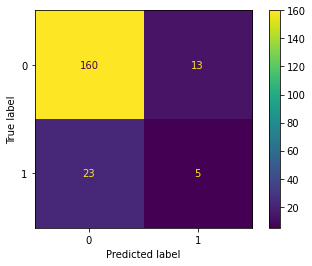

In [544]:
# Create a confusion matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [545]:
# Cross validation
accuracy_score_list = []

for x in range(0, 1500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier()
    scores = cross_validate(estimator=model, X=X, y=y, cv=3, scoring="accuracy")
    accuracy_score_list.append(scores["test_score"].mean())

print(statistics.mean(accuracy_score_list).round(5))
print(statistics.median(accuracy_score_list).round(5))

f1_score_list = []

for x in range(0, 1500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = DecisionTreeClassifier()
    scores = cross_validate(estimator=model, X=X, y=y, cv=3, scoring="f1")
    f1_score_list.append(scores["test_score"].mean())

print(statistics.mean(f1_score_list).round(5))
print(statistics.median(f1_score_list).round(5))

0.78807
0.78745
0.22902
0.22821


In [546]:
# Using random forest ensemble learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.8208955223880597

In [595]:
# Cross validation using random forest ensemble learning
accuracy_score_list = []

for x in range(0, 1500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = RandomForestClassifier(n_estimators=1000)
    scores = cross_validate(estimator=model, X=X, y=y, cv=3, scoring="accuracy")
    accuracy_score_list.append(scores["test_score"].mean())

print(statistics.mean(accuracy_score_list).round(5))
print(statistics.median(accuracy_score_list).round(5))

f1_score_list = []

for x in range(0, 1500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model = RandomForestClassifier(n_estimators=1000)
    scores = cross_validate(estimator=model, X=X, y=y, cv=3, scoring="f1")
    f1_score_list.append(scores["test_score"].mean())

print(statistics.mean(f1_score_list).round(5))
print(statistics.median(f1_score_list).round(5))

0.86888
0.86827
0.14612
0.14183


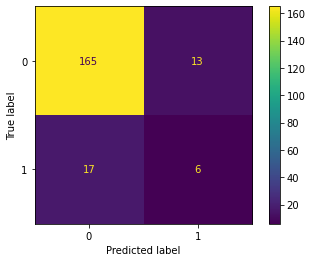

In [594]:
# Create a confusion matrix using random forest ensemble learning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [9]:
# Using voting classifier by combining Logistic Regression, Random Forest Classifier, and Gaussian Naive Bayes
clf1 = LogisticRegression(random_state=1, max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=1000, random_state=1)
clf3 = GaussianNB()

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.87 (+/- 0.01) [Logistic Regression]
Accuracy: 0.86 (+/- 0.01) [Random Forest]
Accuracy: 0.23 (+/- 0.16) [naive Bayes]
Accuracy: 0.86 (+/- 0.02) [Ensemble]


In [47]:
# Cross validation using voting classifier by combining Logistic Regression, Random Forest Classifier, and Gaussian Naive Bayes
accuracy_score_list = []

for x in range(0, 1500):
    clf1 = LogisticRegression(random_state=1, max_iter=1000)
    clf2 = RandomForestClassifier(n_estimators=1000, random_state=1)
    clf3 = GaussianNB()
    eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
    scores = cross_validate(estimator=eclf, X=X, y=y, cv=3, scoring="accuracy")
    accuracy_score_list.append(scores["test_score"].mean())

print(statistics.mean(accuracy_score_list).round(5))
print(statistics.median(accuracy_score_list).round(5))

f1_score_list = []

for x in range(0, 1500):
    clf1 = LogisticRegression(random_state=1, max_iter=1000)
    clf2 = RandomForestClassifier(n_estimators=1000, random_state=1)
    clf3 = GaussianNB()
    eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
    scores = cross_validate(estimator=eclf, X=X, y=y, cv=3, scoring="f1")
    f1_score_list.append(scores["test_score"].mean())

print(statistics.mean(f1_score_list).round(5))
print(statistics.median(f1_score_list).round(5))

0.86678
0.86678
0.19837
0.19837


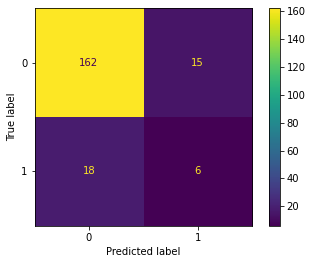

In [46]:
# Create a confusion matrix using voting classifier by combining Logistic Regression, Random Forest Classifier, and Gaussian Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf1 = LogisticRegression(random_state=1, max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=1000, random_state=1)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf.fit(X_train, y_train)
predictions = eclf.predict(X_test)

cm = confusion_matrix(y_true=y_test, y_pred=predictions)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

In [ ]:
#https://scikit-learn.org/stable/unsupervised_learning.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html